In [1]:
#import the dependencies
import pandas as  pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
print(data.shape)

(1025, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


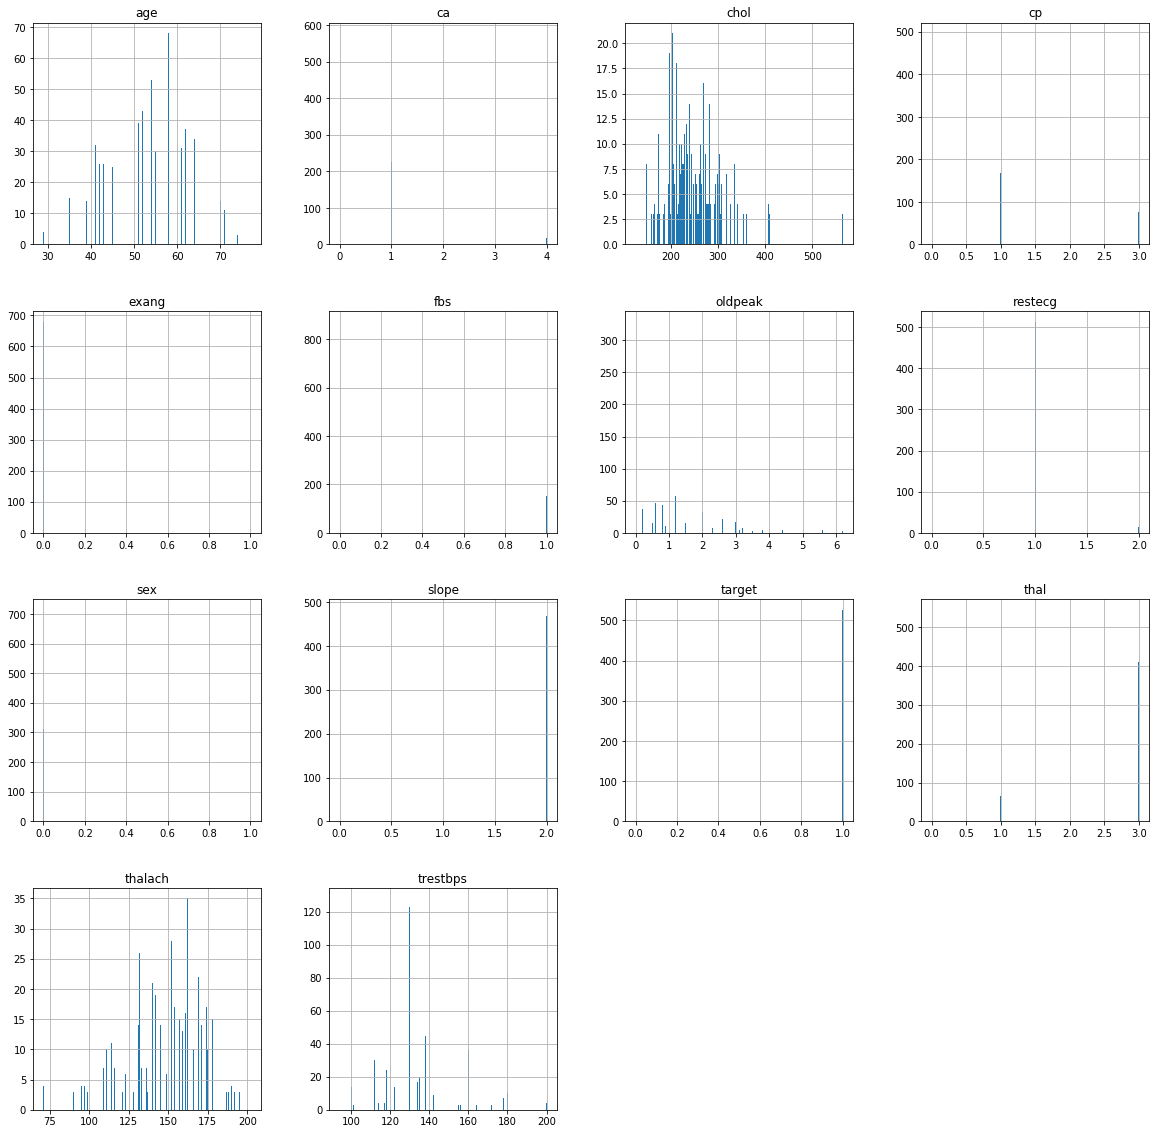

In [10]:
import matplotlib.pyplot as plt
data.hist(bins=500, figsize=(20, 20))
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = data.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(data.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_traindf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [12]:
y = data['target']
x = data.drop(['target'], axis=1)
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in x.columns:
    x[i] = encoder.fit_transform(x[i])
    
# x

In [14]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(x, y)

# summarize the selection of the attributes
# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support())]
# selected_features = [v for i, v in feature_map if i==True]
selected_features = rfe.ranking_
selected_features

array([1, 2, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [23]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state=7)
svm = SVC(kernel='linear')
abc = AdaBoostClassifier(n_estimators=100)
gbc = GradientBoostingClassifier(n_estimators=290)
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()

In [24]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [25]:
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [27]:
gbc.fit(x_train, y_train)
# print("Training Time for Gradient Boosting Classifier:", round(time.time()-t0, 3), "s")

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=290,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, rf.predict(x_test))
# predict = rf.predict(x_test)
# accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)
confusion_matrix = metrics.confusion_matrix(y_test, rf.predict(x_test))
print(confusion_matrix)
# scores = metrics.cross_val_score(rf, x_train, y_train, cv=10)
# print(scores.mean())
classification = metrics.classification_report(y_train, rf.predict(x_train))
classification

Accuracy:  94.28571428571428
[[19  2]
 [ 0 14]]


'              precision    recall  f1-score   support\n\n           2       1.00      1.00      1.00       437\n           4       1.00      1.00      1.00       227\n\n    accuracy                           1.00       664\n   macro avg       1.00      1.00      1.00       664\nweighted avg       1.00      1.00      1.00       664\n'

In [29]:
predict = svm.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  91.42857142857143


In [103]:
predict = abc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  79.48717948717949


In [104]:
predict = gbc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  76.92307692307693


In [105]:
predict = dt.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  69.23076923076923


In [106]:
predict = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  69.23076923076923


In [107]:
predict = gnb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict)
print("Accuracy: ", accuracy*100)

Accuracy:  82.05128205128204


In [108]:
# from sklearn.ensemble import VotingClassifier
# #create a dictionary of our models
# estimators_1=[('knn', knn), ('rf', rf)]
# #create our voting classifier, inputting our models
# ensemble_1 = VotingClassifier(estimators_1, voting='hard')

In [109]:
# estimators_2=[('svm', sv), ('rf', rf)]
# ensemble_2 = VotingClassifier(estimators_2, voting='hard')

In [110]:
# estimators_3=[('knn', knn), ('svm', sv)]
# ensemble_3 = VotingClassifier(estimators_3, voting='hard')

In [111]:
# estimators_4=[('adb', abc), ('gdc', gbc)]
# ensemble_4 = VotingClassifier(estimators_4, voting='hard')

In [112]:
# estimators_5=[('svm', sv), ('adb', abc)]
# ensemble_5 = VotingClassifier(estimators_5, voting='hard')

In [113]:
# #fit model to training data
# ensemble_1.fit(x_train, y_train)
# print("Training time:", round(time.time()-t0, 3), "s")
# #test our model on the test data
# # print(ensemble.score(x_test, y_test))
# t1 = time.time()
# predict = ensemble_1.predict(x_test)
# print("Testing Time for Ensemble Classifier:", round(time.time()-t1, 3), "s")
# accuracy = metrics.accuracy_score(y_test, predict)
# print("Accuracy: ", accuracy*100)

In [114]:
# #fit model to training data
# t0 = time.time()
# ensemble_2.fit(x_train, y_train)
# print("Training time:", round(time.time()-t0, 3), "s")
# #test our model on the test data
# # print(ensemble.score(x_test, y_test))
# t1 = time.time()
# predict = ensemble_2.predict(x_test)
# print("Testing Time for Ensemble Classifier:", round(time.time()-t1, 3), "s")
# accuracy = metrics.accuracy_score(y_test, predict)
# print("Accuracy: ", accuracy*100)

In [115]:
# #fit model to training data
# t0 = time.time()
# ensemble_3.fit(x_train, y_train)
# print("Training time:", round(time.time()-t0, 3), "s")
# #test our model on the test data
# # print(ensemble.score(x_test, y_test))
# t1 = time.time()
# predict = ensemble_3.predict(x_test)
# print("Testing Time for Ensemble Classifier:", round(time.time()-t1, 3), "s")
# accuracy = metrics.accuracy_score(y_test, predict)
# print("Accuracy: ", accuracy * 100)

In [116]:
# #fit model to training data
# t0 = time.time()
# ensemble_4.fit(x_train, y_train)
# print("Training time:", round(time.time()-t0, 3), "s")
# #test our model on the test data
# # print(ensemble.score(x_test, y_test))
# t1 = time.time()
# predict = ensemble_4.predict(x_test)
# print("Testing Time for Ensemble Classifier:", round(time.time()-t1, 3), "s")
# accuracy = metrics.accuracy_score(y_test, predict)
# print("Accuracy: ", accuracy * 100)

In [117]:
# #fit model to training data
# t0 = time.time()
# ensemble_5.fit(x_train, y_train)
# print("Training time:", round(time.time()-t0, 3), "s")
# #test our model on the test data
# # print(ensemble.score(x_test, y_test))
# t1 = time.time()
# predict = ensemble_5.predict(x_test)
# print("Testing Time for Ensemble Classifier:", round(time.time()-t1, 3), "s")
# accuracy = metrics.accuracy_score(y_test, predict)
# print("Accuracy: ", accuracy * 100)